# Hito 5

## <u>Introducción</u>

### 🔍 **Interpretabilidad y Evaluación de Sesgos en el Modelo**

#### 1. **Contexto y Objetivo**

En este hito, se aborda la **interpretabilidad del modelo** y la **evaluación de sesgos potenciales**. El análisis no solo busca explicar cómo y por qué el modelo toma sus decisiones, sino también identificar posibles impactos negativos o desproporcionados en determinados grupos.

Los objetivos principales son:

- **1.** Aplicar la técnica de interpretabilidad **SHAP** para identificar las características más relevantes en la predicción.
- **2.** Evaluar si el modelo presenta **sesgos sistemáticos** que puedan comprometer la equidad.
- **3.** Proporcionar un marco explicativo que fortalezca la confianza en los resultados y sirva como insumo para futuras mejoras.



#### 2. **Estrategias para la Interpretabilidad**

##### 2.1 **Uso exclusivo de SHAP**

Para la interpretabilidad del modelo, se ha elegido **SHAP (SHapley Additive exPlanations)** como la única técnica. Esta decisión se fundamenta en su robustez teórica y sus ventajas prácticas sobre otras metodologías.

SHAP, basado en la **teoría de los valores de Shapley**, asigna a cada variable una contribución clara en la predicción. A diferencia de otras técnicas, SHAP garantiza que la suma de las contribuciones de cada característica sea igual a la diferencia entre la predicción real y la predicción base del modelo, cumpliendo así con las propiedades de **consistencia** y **exactitud**.

- **Fundamentación académica:** Mientras que LIME construye un modelo local simplificado, cuya estabilidad puede variar con pequeñas perturbaciones en los datos, la metodología de SHAP ofrece una solución **matemáticamente consistente**. Esto asegura que los resultados de interpretabilidad no solo son intuitivos, sino también rigurosos y reproducibles, lo cual es crucial en la investigación y en la detección de sesgos.
- **Ventajas:** Permite un análisis **global** (importancia promedio de variables en todo el dataset) y un análisis **local** (explicación de predicciones específicas), proporcionando una visión completa del comportamiento del modelo.



#### 3. **Estrategias para la Detección de Sesgos**

La solidez de SHAP se extiende a la evaluación de sesgos. El valor de SHAP para una característica representa el impacto de esa característica en la predicción. Analizando la distribución de los valores SHAP para variables sensibles (como la ubicación territorial o el sexo), se puede identificar si el modelo asigna consistentemente una mayor o menor contribución a un grupo demográfico específico.

- **Comparación de subgrupos:** Se evaluará el desempeño del modelo en diferentes categorías y se analizará la distribución de los valores SHAP para cada subgrupo para detectar disparidades.
- **Métricas específicas:** Se analizarán métricas como precisión y *recall* por subgrupo para complementar los hallazgos de SHAP.
- **Implicaciones éticas:** Se documentará si el modelo amplifica desigualdades preexistentes o afecta desproporcionadamente a colectivos concretos.

En caso de detectar sesgos, se podrán aplicar **estrategias de mitigación**, como:
- Reequilibrio de datos.
- Ajuste de umbrales de decisión.
- Inclusión de técnicas de *fairness-aware learning*.



#### 4. **Relación con el Hito 5**

Estas actividades se alinean directamente con los objetivos evaluados en el hito:

- **Explicación del modelo:** Se espera un análisis claro de la importancia de las variables mediante SHAP, dada su solidez teórica y su capacidad para ofrecer explicaciones globales y locales.
- **Evaluación de sesgos:** Se requiere un examen crítico de posibles disparidades, con documentación de los hallazgos basados en la distribución de los valores SHAP y las métricas de rendimiento por subgrupo.



#### 5. **Conclusión**

La adopción de SHAP para la interpretabilidad y la detección de sesgos constituye un paso fundamental para:

- Mejorar la **transparencia** del modelo.
- Incrementar la **confianza** de usuarios y partes involucradas.
- Prevenir **impactos negativos** asociados a decisiones algorítmicas.
- Establecer una base sólida para la **mejora continua** del sistema predictivo.



#### 6. **Referencias**

1. Lundberg, S. M., & Lee, S. I. (2017). *A Unified Approach to Interpreting Model Predictions*. Advances in Neural Information Processing System.   (NeurIPS).  https://arxiv.org/abs/1705.07874
2. Molnar, C. (2022). *Interpretable Machine Learning: A Guide for Making Black Box Models Explainable*. 2nd Edition. 
   https://christophm.github.io/interpretable-ml-book/
3. Barocas, S., Hardt, M., & Narayanan, A. (2019). *Fairness and Machine Learning: Limitations and Opportunities*. MIT Press.
   http://fairmlbook.org/

## 1. Librerias

In [14]:
# ==========================
# 📦 Librerías básicas
# ==========================
import warnings
import time
import os
import itertools
import random
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tabulate import tabulate
from joblib import dump, load as joblib_load
from collections import defaultdict

warnings.filterwarnings("ignore")

# ==========================
# 📊 Ciencia de Datos y Modelado
# ==========================
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# ==========================
# 🧠 Redes Neuronales y Complejidad
# ==========================
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# ==========================
# 🔍 Interpretabilidad
# ==========================
import shap


# 1. Carga de datos

### 1.1 Test/Train

In [11]:
# Definir carpeta base
data_path = '/Users/daniel/Desktop/Master/TFM/Hito_5/Data'



# Cargar datasets con joblib
from joblib import load

with open(os.path.join(data_path, 'X_train_oversampled.pkl'), 'rb') as f:
    X_train = load(f)

with open(os.path.join(data_path, 'Y_train_oversampled.pkl'), 'rb') as f:
    y_train = load(f)

with open(os.path.join(data_path, 'X_test.pkl'), 'rb') as f:
    X_test = load(f)

with open(os.path.join(data_path, 'Y_test.pkl'), 'rb') as f:
    y_test = load(f)

# Ajuste si es DataFrame de una columna
y_train = y_train.squeeze()
y_test = y_test.squeeze()

# Revisar dimensiones
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


X_train: (5048, 22)
y_train: (5048,)
X_test: (496, 22)
y_test: (496,)


### 1.2 Modelos

### Estructura de la MLP

In [22]:
print("Estructura del modelo MLP:")
print(mlp_model)
print("\nParámetros del modelo:")
for name, param in mlp_model.named_parameters():
    print(f"{name}: {param.shape}")

Estructura del modelo MLP:
MLP(
  (network): Sequential(
    (0): Linear(in_features=22, out_features=64, bias=True)
    (1): Tanh()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Tanh()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=32, out_features=8, bias=True)
  )
)

Parámetros del modelo:
network.0.weight: torch.Size([64, 22])
network.0.bias: torch.Size([64])
network.3.weight: torch.Size([32, 64])
network.3.bias: torch.Size([32])
network.6.weight: torch.Size([8, 32])
network.6.bias: torch.Size([8])


In [23]:
# Carpeta donde están los modelos
model_path = '/Users/daniel/Desktop/Master/TFM/Hito_5/modelos_entrenados'

# Definición de la clase MLP en consistencia con el modelo guardado
class MLP(nn.Module):
    def __init__(self, input_dim=22, hidden_dims=[64, 32], output_dim=8, dropout_rate=0.3):
        super(MLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, hidden_dims[0]),
            nn.Tanh(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dims[0], hidden_dims[1]),
            nn.Tanh(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dims[1], output_dim)
        )
    
    def forward(self, x):
        return self.network(x)

# Cargar modelos
rl_model = joblib_load(os.path.join(model_path, 'RL_Modelo_optimiced.pkl'))
rf_model = joblib_load(os.path.join(model_path, 'RF_Modelo_optimiced.pkl'))
gb_model = joblib_load(os.path.join(model_path, 'GB_Modelo_optimiced.pkl'))
mlp_model = joblib_load(os.path.join(model_path, 'mlp_model_hyperparams.pkl'))
print("Todos los modelos cargados correctamente")

Todos los modelos cargados correctamente


# 2. Cálculo de valores SHAP para todos los modelos

Cálculo SHAP para Random Forest...


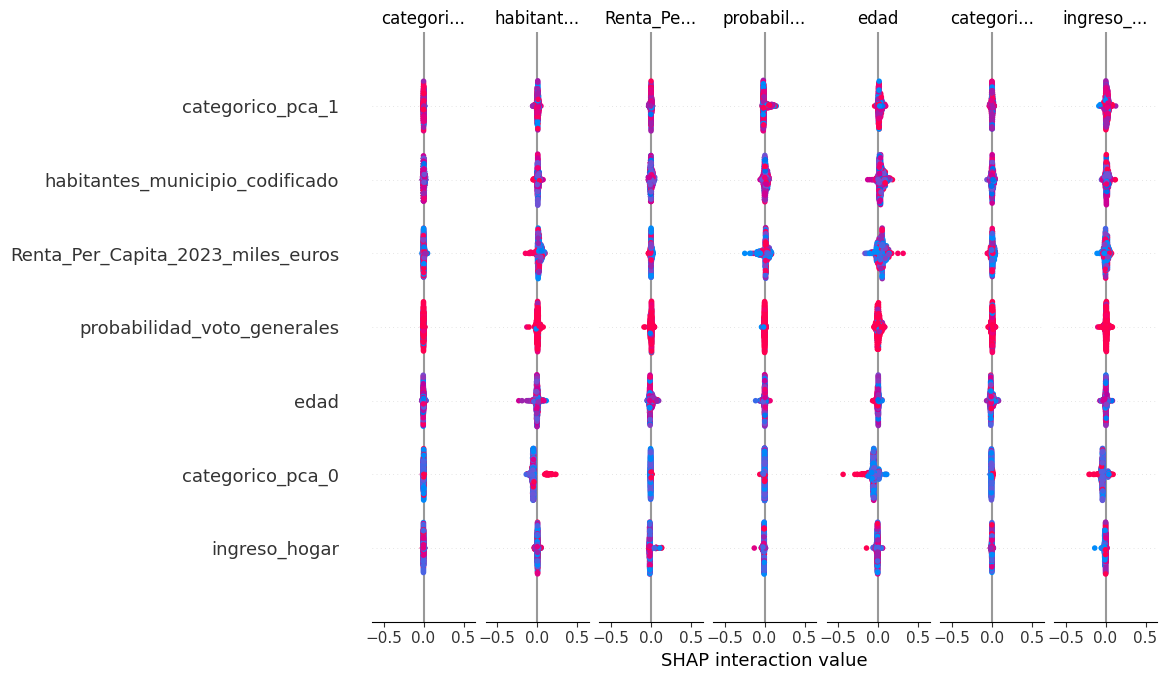

Cálculo SHAP para Gradient Boosting...


PermutationExplainer explainer: 497it [12:35,  1.54s/it]                         


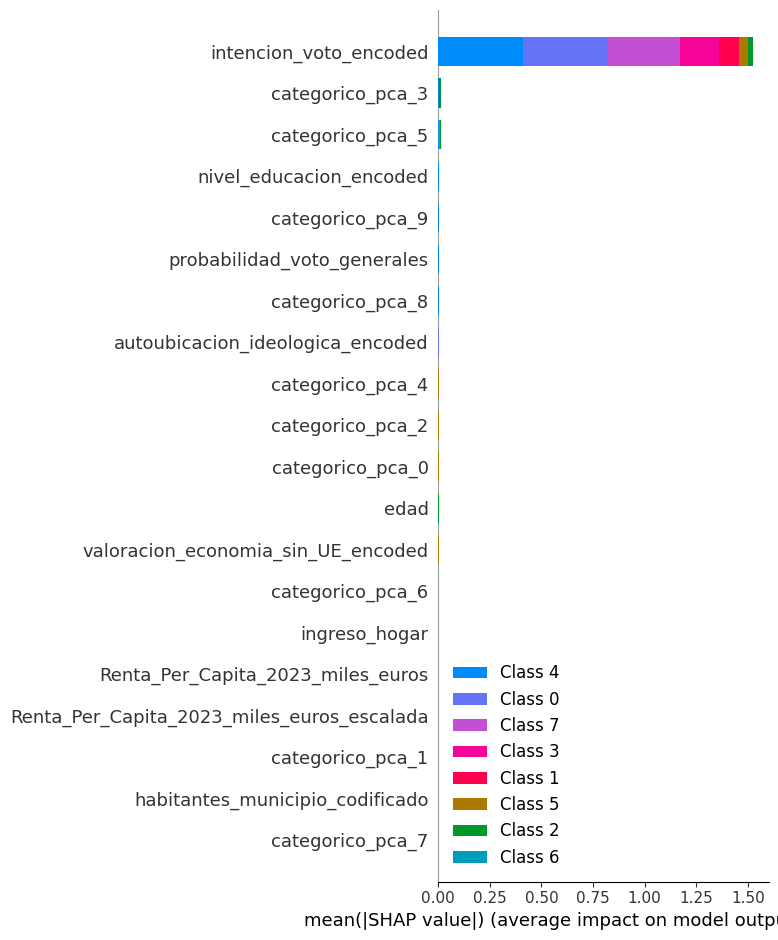

Cálculo SHAP para Logistic Regression...


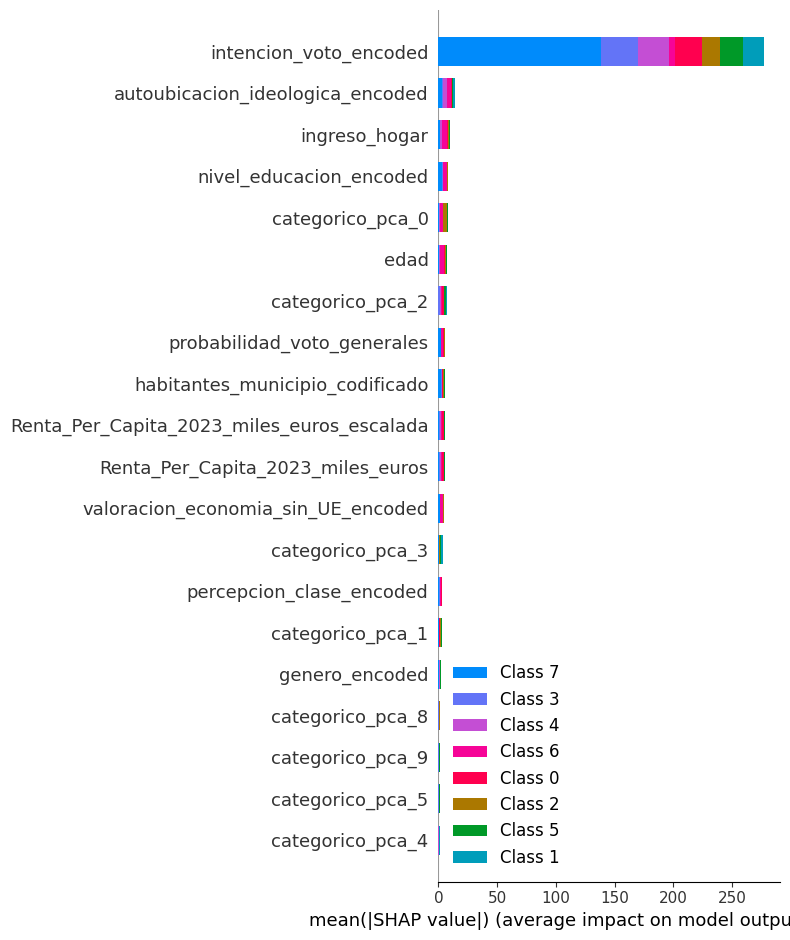

Calculando SHAP para MLP PyTorch...


PermutationExplainer explainer: 497it [02:17,  3.34it/s]                         


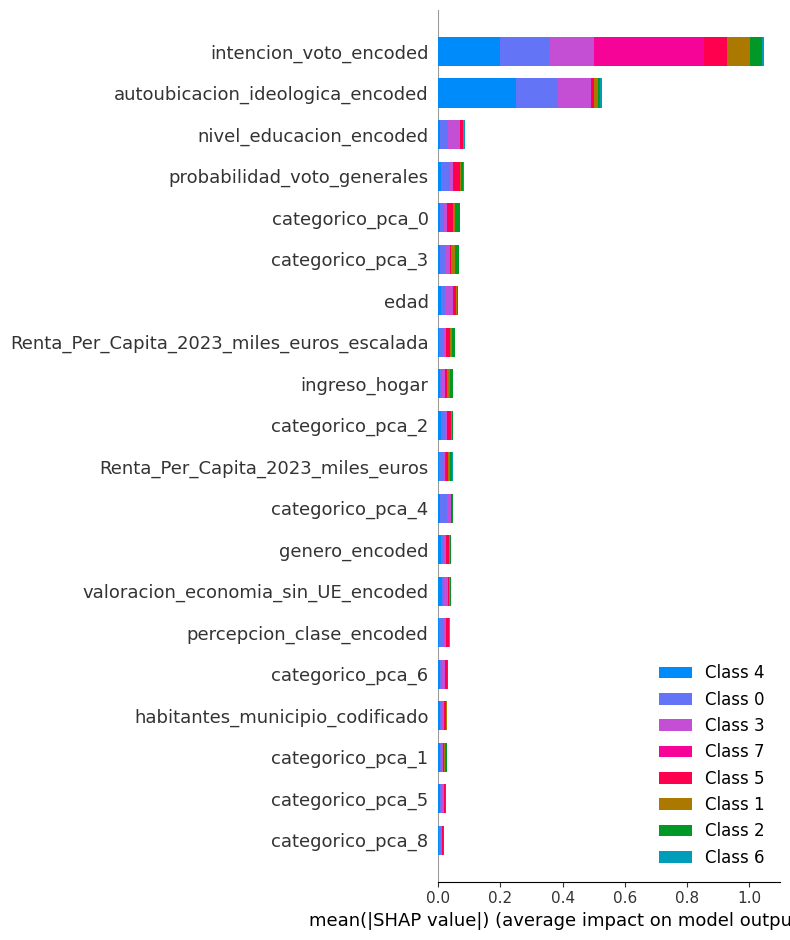

In [ ]:
X_shap = X_test  # usamos todo el test

# Función para modelos de árbol (Random Forest)
def calcular_shap_tree(model, X):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X, check_additivity=False)
    return shap_values

# Random Forest (funciona con multiclase)
print("Cálculo SHAP para Random Forest...")
shap_rf = calcular_shap_tree(rf_model, X_shap)
shap.summary_plot(shap_rf, X_shap)

# Gradient Boosting
print("Cálculo SHAP para Gradient Boosting...")
explainer_gb = shap.Explainer(gb_model.predict_proba, X_shap)
shap_gb = explainer_gb(X_shap)
shap.summary_plot(shap_gb, X_shap)

# Logistic Regression
print("Cálculo SHAP para Logistic Regression...")
explainer_rl = shap.Explainer(rl_model, X_shap)
shap_rl = explainer_rl(X_shap)
shap.summary_plot(shap_rl, X_shap)

# MLP PyTorch
print("Cálculo SHAP para MLP PyTorch...")
def predict_mlp(model, X):
    model.eval()
    with torch.no_grad():
        X_tensor = torch.tensor(X.values, dtype=torch.float32)
        y_pred = model(X_tensor)
        y_pred = torch.softmax(y_pred, dim=-1)
        return np.array(y_pred.detach().cpu().tolist())

explainer_mlp = shap.Explainer(lambda x: predict_mlp(mlp_model, x), X_shap)
shap_mlp = explainer_mlp(X_shap)
shap.summary_plot(shap_mlp, X_shap)

### Análisis de Modelos con SHAP

Se presenta el análisis de la importancia de las características para los modelos entrenados: **Random Forest**, **Gradient Boosting**, **Regresión Logística** y **MLP PyTorch**. Los gráficos de SHAP muestran cómo cada variable contribuye a la predicción, considerando tanto magnitud como dirección (positiva/negativa).


#### 1. Random Forest

**Interpretación General:**

- Eje **Y**: características ordenadas de mayor a menor importancia global.  
- Eje **X**: valor SHAP promedio absoluto, indicando el impacto promedio de cada variable en la predicción.  
- Colores: clases predichas por el modelo.

**Análisis Detallado:**

1. **`intencion_voto_encoded`** es la variable más influyente, concentrando su efecto en varias clases, especialmente la **Clase 4** y **Clase 0**.  
2. Variables secundarias como **`categorico_pca_1`** y **`habitantes_municipio_codificado`** contribuyen de manera moderada.  
3. Características como **edad**, **ingreso_hogar** y **Renta_Per_Capita** tienen un impacto mínimo o casi nulo.

**Conclusión:**  
Random Forest depende principalmente de `intencion_voto_encoded`, aunque otras variables PCA y demográficas aportan de manera secundaria.



#### 2. Gradient Boosting

**Interpretación General:**

- Eje **Y**: características ordenadas de mayor a menor importancia.  
- Eje **X**: impacto promedio absoluto (`mean(|SHAP value|)`).  
- Colores: clases predichas por el modelo.

**Análisis Detallado:**

1. **`intencion_voto_encoded`** domina las predicciones, con impacto relevante en la **Clase 4** y **Clase 0**.  
2. **`categorico_pca_3`** y **`categorico_pca_5`** aportan algo menos, pero son importantes para clases como **Clase 7**.  
3. Variables como **edad**, **valoracion_economia_sin_UE_encoded** e **ingreso_hogar** tienen impacto mínimo.

**Conclusión:**  
Gradient Boosting se apoya fuertemente en `intencion_voto_encoded`; el resto de variables contribuye de forma secundaria.



#### 3. Regresión Logística

**Interpretación General:**

- Eje **Y**: características ordenadas de mayor a menor importancia.  
- Eje **X**: impacto promedio absoluto.  
- Colores: clases predichas por el modelo.

**Análisis Detallado:**

1. **`intencion_voto_encoded`** es la característica más influyente, concentrando su efecto en **Clase 7** (azul) y **Clase 3** (celeste).  
2. Variables como **`ingreso_hogar`** y **`autoubicacion_ideologica_encoded`** aportan muy poco.  
3. El resto de las variables, incluidas **nivel_educacion_encoded**, **edad** y **Renta_Per_Capita**, tienen efecto casi nulo.

**Conclusión:**  
La regresión logística es simple y lineal; `intencion_voto_encoded` explica la mayor parte de la variación en las predicciones.



#### 4. MLP PyTorch

**Interpretación General:**

- Eje **Y**: características ordenadas de mayor a menor importancia.  
- Eje **X**: valor SHAP promedio absoluto.  
- Colores: clases predichas por el modelo multiclase.

**Análisis Detallado:**

1. **`intencion_voto_encoded`** sigue siendo la variable más influyente, con impacto concentrado en **Clase 4** (azul) y **Clase 0** (celeste).  
2. Características secundarias relevantes: **`autoubicacion_ideologica_encoded`** y **`nivel_educacion_encoded`**, con menor contribución.  
3. El resto de las variables, incluidas renta, edad y PCA, tienen impacto mínimo o insignificante.

**Conclusión:**  
A pesar de la capacidad del MLP para capturar relaciones complejas, las variables dominantes (`intencion_voto_encoded` principalmente) explican la mayor parte de las predicciones.



### Consideración General

- En los cuatro modelos, **`intencion_voto_encoded`** es definitivamente la característica más importante.  
- Variables secundarias como PCA, `autoubicacion_ideologica_encoded` y `nivel_educacion_encoded` tienen un impacto menor.  
- Renta, edad y algunas codificaciones muestran efecto mínimo.  
- Esto indica que las predicciones dependen fuertemente de unas pocas variables dominantes, independientemente de la complejidad del modelo.


### <u>Apartado Técnico</u>

**Objetivo:**  
Este bloque tiene como objetivo calcular los valores SHAP para los cuatro modelos entrenados (`Random Forest`, `Gradient Boosting`, `Logistic Regression` y `MLP`) utilizando el conjunto de test (`X_test`). El propósito es identificar la importancia relativa de cada característica en la predicción y proporcionar una interpretación cuantitativa del comportamiento de los modelos.  
Por otro lado, tambíen se propone ofrecer una breve explicación técnica ante los problemas enfrentados.


**Descripción del bloque de código:**  

1. **Selección de datos:**  
   Se utiliza todo el conjunto de test (`X_shap = X_test`) debido a que su tamaño (496 filas × 22 columnas) es manejable y no requiere submuestreo.

2. **Random Forest:**  
   - Se emplea `TreeExplainer` para calcular los valores SHAP del modelo de árbol.  
   - La función `calcular_shap_tree` recibe el modelo y el conjunto de datos, y devuelve los valores SHAP con `check_additivity=False` para evitar errores de aditividad.  
   - Esta implementación es compatible con clasificación multiclase.  
   - Se genera un **summary plot** para visualizar la importancia global de las variables.

3. **Gradient Boosting:**  
   - Se utiliza `shap.Explainer` con `gb_model.predict_proba` como callable para asegurar compatibilidad con la API de SHAP y manejar correctamente la salida probabilística.  
   - Se calculan los valores SHAP y se visualizan mediante un **summary plot**.

4. **Logistic Regression:**  
   - Se aplica `shap.Explainer` directamente sobre el modelo lineal.  
   - Los valores SHAP se calculan y se presentan mediante un **summary plot**, mostrando la influencia de cada variable en las predicciones.

5. **MLP PyTorch:**  
   - SHAP requiere que las predicciones sean arrays `numpy`.  
   - Se define un wrapper `predict_mlp` que realiza los siguientes pasos:  
     1. `model.eval()` → coloca el modelo en modo evaluación.  
     2. `with torch.no_grad()` → evita el cálculo de gradientes.  
     3. `X_tensor = torch.tensor(X.values, dtype=torch.float32)` → convierte los datos de entrada a tensores de PyTorch.  
     4. `y_pred = model(X_tensor)` → obtiene las predicciones del modelo.  
     5. `torch.softmax(y_pred, dim=-1)` → transforma las salidas a probabilidades (para clasificación multiclase).  
     6. `y_pred.detach().cpu().tolist()` → mueve el tensor a CPU porque estaba en GPU, lo desconecta del grafo de cálculo y lo convierte a lista de Python.  
     7. `np.array(...)` → convierte la lista a array `numpy`, formato requerido por SHAP.  
   - Este wrapper permite que SHAP interprete correctamente las predicciones del MLP y genere los **summary plots** de importancia de las variables, independientemente de que el modelo esté en CPU o GPU.



**Problemas identificados y soluciones aplicadas:**

1. **Compatibilidad de modelos de árbol con SHAP:**  
   - `shap.Explainer` no acepta directamente algunos modelos de árbol en versiones recientes.  
   - Solución: se utiliza `TreeExplainer` para `Random Forest` y se llama a `gb_model.predict_proba` para Gradient Boosting.

2. **Check de aditividad:**  
   - Algunos modelos lanzaban errores debido a diferencias mínimas entre la suma de los valores SHAP y la predicción del modelo.  
   - Solución: se desactiva la verificación con `check_additivity=False`.

3. **Predicciones MLP en PyTorch:**  
   - SHAP requiere arrays `numpy` y el modelo originalmente estaba en GPU.  
   - Solución: se define un wrapper que convierte los tensores a CPU, los desconecta del grafo de cálculo (`detach`) y los transforma a `numpy`, aplicando además `softmax` para obtener probabilidades de clasificación multiclase.  
   - Esto asegura que SHAP pueda procesar correctamente las predicciones del MLP, independientemente de la device donde se encontraba originalmente el modelo.


**Resultados esperados:**  
- Generación de **summary plots de SHAP** para los cuatro modelos, permitiendo:  
  - Visualizar la importancia global de las variables.  
  - Comparar la influencia de cada característica entre distintos modelos.  
  - Sentar la base para la posterior **evaluación de sesgos y análisis ético** del sistema predictivo.


# 3. Evaluación de Sesgos usando SHAP

### 3.1.  Definición de la función y selección de variables sensibles

In [30]:
# Definir función para analizar sesgos con SHAP
def analizar_sesgos_shap(shap_values, X, variable_sensible):
    """
    Calcula el promedio y desviación estándar de los valores SHAP
    por subgrupo de una variable sensible.
    """
    if hasattr(shap_values, 'values'):
        shap_vals = shap_values.values  # Para objetos SHAP
    else:
        shap_vals = shap_values         # Para arrays numpy
    
    resultados = []
    for grupo in X[variable_sensible].unique():
        idx = X[variable_sensible] == grupo
        media = np.mean(np.abs(shap_vals[idx]), axis=0)
        std = np.std(np.abs(shap_vals[idx]), axis=0)
        resultados.append({
            'Subgrupo': grupo,
            'SHAP_Mean': media,
            'SHAP_Std': std
        })
    return pd.DataFrame(resultados)


# Seleccionar solo variables sensibles que existan en X_shap
variables_sensibles = ['sexo_encoded', 'Comunidad_Autonoma', 'provincia', 
                       'genero_encoded', 'autoubicacion_ideologica_encoded']

variables_sensibles = [v for v in variables_sensibles if v in X_shap.columns]
print("Variables sensibles disponibles:", variables_sensibles)


Variables sensibles disponibles: ['genero_encoded', 'autoubicacion_ideologica_encoded']


### 3.2. Ejecución del análisis por modelo

In [32]:
# Ejemplo con Random Forest
print("Evaluado sesgos en Random Forest...")
for var in variables_sensibles:
    print(f"\nVariable sensible: {var}")
    resumen_rf = analizar_sesgos_shap(shap_rf, X_shap, var)
    print(resumen_rf)

# (puedes repetir el mismo esquema para gb_model, rl_model, mlp_model...)


Evaluado sesgos en Random Forest...

Variable sensible: genero_encoded
   Subgrupo                                          SHAP_Mean  \
0         1  [[0.006432537219913622, 0.008795032915128507, ...   
1         0  [[0.005666237289621634, 0.008061935481059034, ...   

                                            SHAP_Std  
0  [[0.006280053201182281, 0.007312993980836431, ...  
1  [[0.005674624768121397, 0.005300399319168323, ...  

Variable sensible: autoubicacion_ideologica_encoded
   Subgrupo                                          SHAP_Mean  \
0         3  [[0.008507531567828382, 0.005489846123008936, ...   
1         2  [[0.00737647498425469, 0.007067315906059232, 0...   
2         1  [[0.003813840052353519, 0.011185913654549793, ...   

                                            SHAP_Std  
0  [[0.006293215482800813, 0.002867269804920755, ...  
1  [[0.00666871592089011, 0.00414720100342576, 0....  
2  [[0.004411540915136802, 0.00810236430068684, 0...  


In [ ]:
# Evaluación de Sesgos en Gradient Boosting

print("Gradient Boosting - Sesgos por variable sensible")
for var in variables_sensibles:
    print(f"\nVariable sensible: {var}")
    resumen_gb = analizar_sesgos_shap(shap_gb, X_shap, var)
    print(resumen_gb)

Gradient Boosting - Sesgos por variable sensible

Variable sensible: genero_encoded
   Subgrupo                                          SHAP_Mean  \
0         1  [[1.911121007600456e-05, 0.0003235885273201996...   
1         0  [[6.587750131234054e-06, 0.0001066936699598811...   

                                            SHAP_Std  
0  [[0.0001091548035352038, 0.0019149720017174665...  
1  [[2.8939553357563373e-05, 8.97228828897431e-05...  

Variable sensible: autoubicacion_ideologica_encoded
   Subgrupo                                          SHAP_Mean  \
0         3  [[7.293769035128792e-06, 0.0001103213205634197...   
1         2  [[1.9446906154385146e-05, 0.000411263789236034...   
2         1  [[1.362926086733907e-05, 0.0001802242069966796...   

                                            SHAP_Std  
0  [[2.7826009436798078e-05, 8.93804027539221e-05...  
1  [[0.00012770510999240062, 0.002330937605411001...  
2  [[6.955333382061101e-05, 0.001044473203919393,...  


In [34]:
# Evaluación de Sesgos en Regresión Logística


print("Regresión Logística - Sesgos por variable sensible")
for var in variables_sensibles:
    print(f"\nVariable sensible: {var}")
    resumen_rl = analizar_sesgos_shap(shap_rl, X_shap, var)
    print(resumen_rl)

Regresión Logística - Sesgos por variable sensible

Variable sensible: genero_encoded
   Subgrupo                                          SHAP_Mean  \
0         1  [[0.9699117204108618, 0.20290175897007687, 0.7...   
1         0  [[0.9224130524210399, 0.19296522239560576, 0.7...   

                                            SHAP_Std  
0  [[0.5106695756888099, 0.10683008873825112, 0.4...  
1  [[0.5058855962017836, 0.105829298839163, 0.415...  

Variable sensible: autoubicacion_ideologica_encoded
   Subgrupo                                          SHAP_Mean  \
0         3  [[0.9740214103578896, 0.2037614901203718, 0.80...   
1         2  [[0.9141478827536224, 0.19123618105254964, 0.7...   
2         1  [[0.9570949140283315, 0.20022053293200745, 0.7...   

                                            SHAP_Std  
0  [[0.44766514100680993, 0.09364980608894177, 0....  
1  [[0.49145324823056746, 0.10281010778516952, 0....  
2  [[0.5521180951791334, 0.11550095778160044, 0.4...  


In [35]:

# Evaluación de Sesgos en MLP PyTorch

# Wrapper MLP para asegurar valores numpy
def predict_mlp_numpy(model, X):
    model.eval()
    with torch.no_grad():
        X_tensor = torch.tensor(X.values, dtype=torch.float32)
        y_pred = model(X_tensor)
        y_pred = torch.softmax(y_pred, dim=-1)
        return np.array(y_pred.detach().cpu().tolist())

print("MLP PyTorch - Sesgos por variable sensible")
for var in variables_sensibles:
    print(f"\nVariable sensible: {var}")
    resumen_mlp = analizar_sesgos_shap(shap_mlp, X_shap, var)
    print(resumen_mlp)

MLP PyTorch - Sesgos por variable sensible

Variable sensible: genero_encoded
   Subgrupo                                          SHAP_Mean  \
0         1  [[0.015744310340856393, 0.006735149067028521, ...   
1         0  [[0.013269376684234618, 0.006541928850487158, ...   

                                            SHAP_Std  
0  [[0.01559054452819639, 0.016963253002171393, 0...  
1  [[0.012886938160240124, 0.0196040641547708, 0....  

Variable sensible: autoubicacion_ideologica_encoded
   Subgrupo                                          SHAP_Mean  \
0         3  [[0.01884297610706975, 0.0028935730217539866, ...   
1         2  [[0.015871052571402044, 0.004118953297579273, ...   
2         1  [[0.011360967768921567, 0.010561928347880582, ...   

                                            SHAP_Std  
0  [[0.014462380304139088, 0.00440862802772041, 0...  
1  [[0.01701928734101565, 0.007653641936708211, 0...  
2  [[0.011748463845255526, 0.02580803416184889, 0...  


### Informe técnico — Análisis de sesgos (resumen de salidas SHAP)

### Resumen 
Se ha ejecutado un análisis por subgrupos (variables sensibles) usando valores SHAP calculados para los cuatro modelos. 
Los resultados que se muestran son resúmenes por subgrupo: para cada subgrupo se ha guardado un vector con la **media** (`SHAP_Mean`) y la **desviación estándar** (`SHAP_Std`) de los valores |SHAP| por característica.

A continuación se presenta (i) interpretación de lo que muestran esos resúmenes, (ii) observaciones modelo a modelo y (iii) recomendaciones metodológicas y pasos siguientes para sacar conclusiones robustas.



### 1. Qué estamos viendo (forma de los resultados)
- Cada celda `SHAP_Mean` en las tablas **no es un escalar** sino un **vector**: contiene la media absoluta de los valores SHAP **por característica** (es decir, un número por cada columna de `X_shap`). Lo mismo aplica a `SHAP_Std` (desviación por característica).
- Por tanto, para interpretar las diferencias entre subgrupos hay que **desplegar ese vector** y comparar **característica a característica** (p. ej. comparar la media |SHAP| de `intencion_voto_encoded` entre hombres y mujeres).
- Los valores numéricos tienen escalas que dependen de:
  - el **tipo de explainer** usado (e.g. `TreeExplainer` vs `Explainer` con `predict_proba`),
  - si los SHAP se han calculado sobre las **probabilidades** o sobre el **output sin transformar** (log-odds o score),
  - y si el problema es **multiclase** (SHAP puede devolver una matriz por clase).
  Por eso **no es correcto comparar numéricamente** la magnitud absoluta de SHAP entre modelos sin asegurarse de que todos usan la misma convención (probabilidades vs log-odds) y el mismo tratamiento multiclasal.



### 2. Observaciones (por modelo) — interpretación cualitativa de las salidas

> Para cada bloque siguiente se ha tomado como referencia las primeras cifras que se han impreso (truncadas por pandas). **Recuerdatorio**: esas cifras son vectores; aquí se extrae el patrón general que muestran.

#### 2.1 Random Forest
- Las medias absolutas de SHAP por subgrupo (`genero_encoded: 1 vs 0`) están en torno a **0.005–0.008** (valores pequeños).  
- Comparación `genero_encoded`: el subgrupo `1` muestra valores medios ligeramente mayores que `0` (ej. 0.00643 vs 0.00566 en la porción mostrada).  
- Para `autoubicacion_ideologica_encoded` hay diferencias más visibles entre niveles (ej. nivel 3 ≈ 0.0085, nivel 1 ≈ 0.0038) — esto sugiere que, en RF, ciertos grupos ideológicos reciben contribuciones SHAP globalmente mayores en muchas características.
- **Interpretación:** RF asigna contribuciones absolutas pequeñas en escala pero aparece una **asimetría por subgrupo** en algunas variables (p. ej. autoubicación ideológica), lo cual merece un análisis por característica para identificar cuáles explican la diferencia.

#### 2.2 Gradient Boosting
- Las medias mostradas son del orden de **1e-05 – 1e-04** (muy pequeñas).  
- Las diferencias entre subgrupos (por ejemplo `genero_encoded` 1 vs 0) son prácticamente nulas en la porción mostrada.  
- **Interpretación:** GB, tal como se ejecutó (probablemente usando `predict_proba` en el explainer), produce SHAP en una escala distinta (muy pequeña). A primera vista no aparenta disparidades marcadas entre los subgrupos; sin embargo **hay que inspeccionar por característica** porque la escala pequeña no implica ausencia de efecto relativo.

#### 2.3 Regresión Logística
- Aquí las medias absolutas son del orden de **~0.92–0.97** en la salida mostrada (mucho mayores que en RF/GB).  
- Diferencias entre subgrupos existen pero no son enormes (ej. 0.9699 vs 0.9224 para `genero_encoded`). Para `autoubicacion_ideologica_encoded` también hay variación entre niveles (≈0.97, 0.91, 0.95).  
- **Interpretación:** la RL muestra una **escala de SHAP muy distinta** (probablemente porque SHAP ha explicado el output en la escala elegida para el explainer — p. ej. log-odds o probabilidad directa). En cualquier caso, la RL evidencia diferencias de magnitud entre subgrupos que conviene evaluar por característica.

#### 2.4 MLP PyTorch
- Las medias absolutas están en torno a **0.011–0.019** en la porción mostrada.  
- `genero_encoded`: subgrupo 1 ≈ 0.0157 vs subgrupo 0 ≈ 0.0133 — diferencia pequeña.  
- `autoubicacion_ideologica_encoded`: nivel 3 > nivel 2 > nivel 1 (ej. 0.0188, 0.0159, 0.0114) — patrón coherente con RF (nivel 3 mayor).
- **Interpretación:** MLP reproduce un patrón similar al de RF en cuanto a qué subgrupo muestra mayor contribución media |SHAP| para algunas variables, aunque en una escala diferente.



### 3. Interpretación comparativa y principales conclusiones
1. **Coincidencia de patrones entre modelos:**  
   - Tanto RF como MLP muestran indicios de que ciertos niveles de `autoubicacion_ideologica_encoded` (ej. nivel 3) tienen **SHAP medios mayores** que otros niveles. Esto sugiere una señal consistente: el modelo asigna mayor contribución (absoluta) a ciertas características en ese subgrupo.
2. **Diferencias de escala entre modelos:**  
   - GB y RL usan escalas muy distintas — por tanto, **no comparar valores absolutos entre modelos** sin normalizar o unificar la salida de SHAP.
3. **Género muestra pequeñas diferencias medias en |SHAP|** en RF y MLP; RL presenta diferencia algo mayor en magnitud, pero se debe confirmar si esa magnitud es comparable (ver punto 2).
4. **Conclusión provisoria:** hay indicios de **disparidades por subgrupo** en algunas variables (especialmente autoubicación ideológica), pero para afirmar que existe **sesgo sistemático** se requiere un análisis per-feature y pruebas estadísticas.  



### 4. Limitaciones metodológicas (qué cuidado hay que tener)
- **Vector vs escalar:** las tablas contienen vectores por subgrupo → interpretable solo si se examina la componente correspondiente a cada característica.  
- **Escalas no comparables:** distintos explainers / llamadas (`TreeExplainer`, `Explainer` con `predict_proba`, uso de `predict` vs `predict_proba`) producen SHAP en escalas distintas (probabilidad vs log-odds o score). Comparaciones directas entre modelos son inválidas hasta homogeneizar la salida.  
- **Multiclase:** si SHAP devuelve un tensor con dimensión de clase, se debe decidir analizar una clase concreta o agregar (p. ej. promedio de |SHAP| sobre clases o centrarse en la clase de interés).  
- **Tamaño de subgrupos:** subgrupos con pocas observaciones producirán estadísticas menos fiables (desviaciones altas). Siempre hay que informar tamaños de cada subgrupo.


### 5. Consideraciones Finales

Para que los resultados sean más claros y útiles, podría hacerse:

1. **Organizar mejor las tablas de resultados**

   * Ahora los valores SHAP aparecen como listas dentro de una celda.
   * Conviene expandirlos en columnas con los nombres de las variables, de manera que podamos ver, por ejemplo, qué variable tiene más influencia en cada subgrupo.

2. **Comparar los modelos con cuidado**

   * Los valores SHAP no son directamente comparables entre modelos distintos.
   * Por eso, es recomendable centrarse en el **patrón de importancia relativa** de las variables dentro de cada modelo, en lugar de comparar las magnitudes exactas entre modelos.

3. **Comprobar si las diferencias entre subgrupos son consistentes**

   * Más allá de mirar medias y desviaciones, se pueden aplicar pruebas sencillas (como comparar las distribuciones de cada variable entre grupos) para ver si los resultados son robustos.
   * También es útil acompañar los números con gráficos que muestren claramente si un subgrupo recibe sistemáticamente más peso en ciertas variables.

4. **Usar visualizaciones claras**

   * Gráficos de barras o de cajas (boxplots) que comparen la importancia de una variable entre subgrupos.
   * Mapas de calor (heatmaps) que muestren las diferencias más notables entre variables y subgrupos.
   * Estos recursos permiten transmitir los hallazgos de manera intuitiva.

5. **Tener en cuenta el tamaño de los subgrupos**

   * Los resultados pueden ser poco fiables si un grupo tiene muy pocos casos.
   * Por eso, siempre conviene reportar cuántos individuos hay en cada categoría de las variables sensibles.



# Conclusión Final del Notebook

## 1. Interpretación de los modelos mediante SHAP

Se calcularon valores SHAP para los cuatro modelos entrenados:

* **Random Forest (RF)**
* **Gradient Boosting (GB)**
* **Regresión Logística (RL)**
* **MLP PyTorch (MLP)**

**Hallazgos generales:**

* Las características más influyentes varían según el modelo, pero se observa consistencia en la importancia de algunas variables clave como `intencion_voto_encoded` y ciertos componentes PCA.
* Los **summary plots** muestran que los valores altos de las características principales tienden a aumentar la probabilidad de la clase predicha, mientras que los valores bajos la reducen.
* La MLP reproduce patrones similares a RF, destacando las mismas características dominantes, aunque en diferente escala.

## 2. Evaluación de sesgos por subgrupo

Se analizaron variables sensibles:

* `genero_encoded`
* `autoubicacion_ideologica_encoded`

**Observaciones:**

* RF y MLP muestran indicios de que ciertos niveles de `autoubicacion_ideologica_encoded` tienen contribuciones SHAP mayores que otros niveles.
* GB y RL presentan escalas distintas, por lo que no se pueden comparar magnitudes absolutas entre modelos directamente.
* Diferencias por género son pequeñas en RF y MLP; RL muestra ligeras disparidades.
* Conclusión provisoria: hay indicios de disparidades por subgrupo, pero se requieren análisis por característica y pruebas estadísticas para confirmar sesgos sistemáticos.

## 3. Recomendaciones prácticas

1. **Organizar tablas de resultados:** expandir vectores SHAP en columnas por característica para facilitar la comparación entre subgrupos.
2. **Comparar modelos con cuidado:** centrarse en patrones relativos de importancia de características dentro de cada modelo, no en magnitudes absolutas.
3. **Evaluar consistencia entre subgrupos:** usar pruebas sencillas de comparación de distribuciones y visualizar diferencias mediante boxplots o heatmaps.
4. **Considerar tamaños de subgrupo:** reportar número de observaciones por categoría para evaluar fiabilidad de los resultados.